In [95]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
from category_encoders import BinaryEncoder, TargetEncoder

In [2]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('data.csv')

In [6]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,25,18.0,False
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,1,1,6.0,False
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,5,0,0.0,True
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,2,11,9.0,False
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,0,0.0,True


In [7]:
X = data.drop(columns='satisfaction')
y = data['satisfaction']

In [8]:
data.groupby('satisfaction', as_index=False).agg({'Gender':'count'})

,satisfaction,Gender
0,False,73452
1,True,56428


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
X_y_train = X_train.copy(deep=True)
X_y_train['y'] = y_train

In [12]:
X_y_train.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes              True
y                                    False
dtype: bool

In [13]:
X_y_train[X_y_train['Arrival Delay in Minutes'].isna()]['Arrival Delay in Minutes']

107098   NaN
84637    NaN
115591   NaN
87261    NaN
117195   NaN
          ..
79013    NaN
99814    NaN
9481     NaN
16881    NaN
71557    NaN
Name: Arrival Delay in Minutes, Length: 294, dtype: float64

In [14]:
X_y_train['Arrival Delay in Minutes'] = X_y_train['Arrival Delay in Minutes'].fillna(5)

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

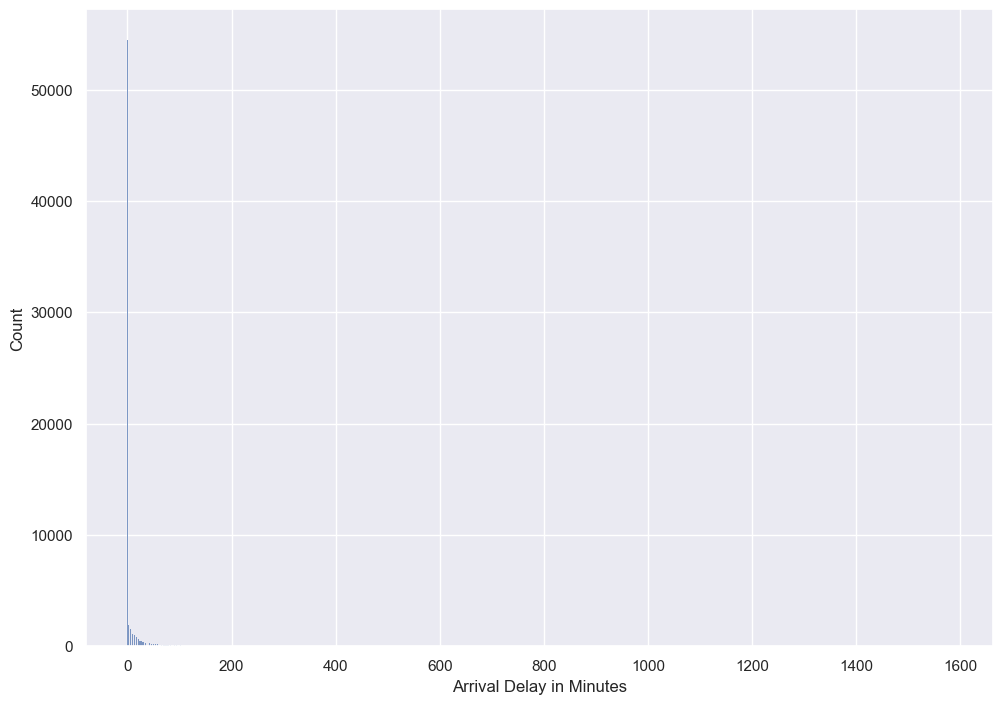

In [16]:
sns.histplot(X_y_train['Arrival Delay in Minutes'])

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

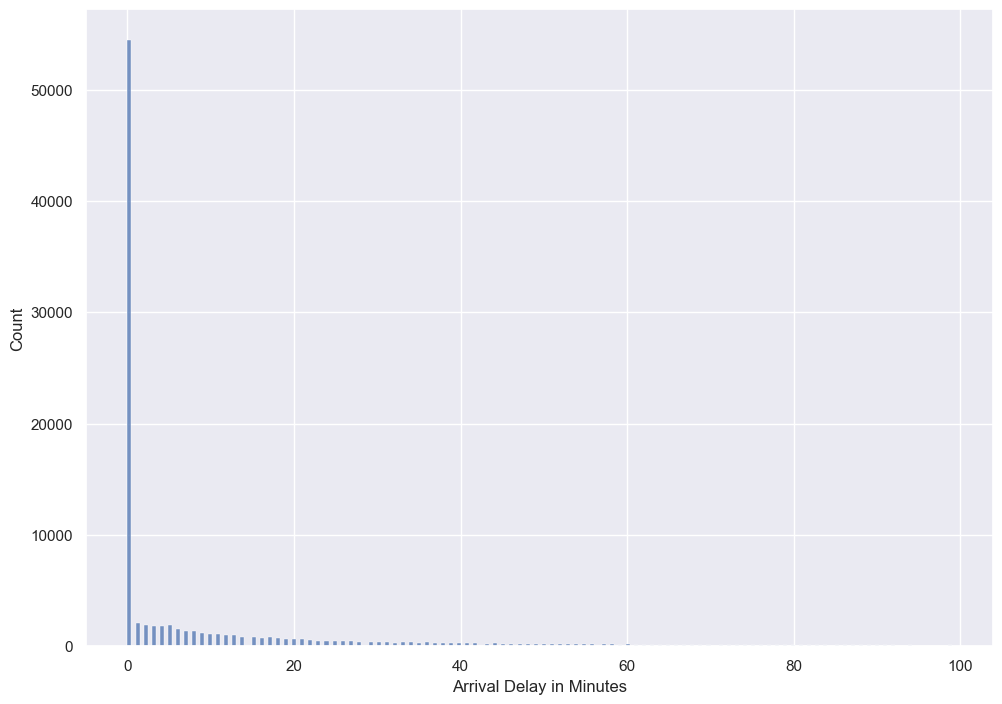

In [17]:
sns.histplot(X_y_train['Arrival Delay in Minutes'][X_y_train['Arrival Delay in Minutes'] < 100])

In [20]:
X_y_train.isna().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
y                                    False
dtype: bool

<Axes: xlabel='y', ylabel='Count'>

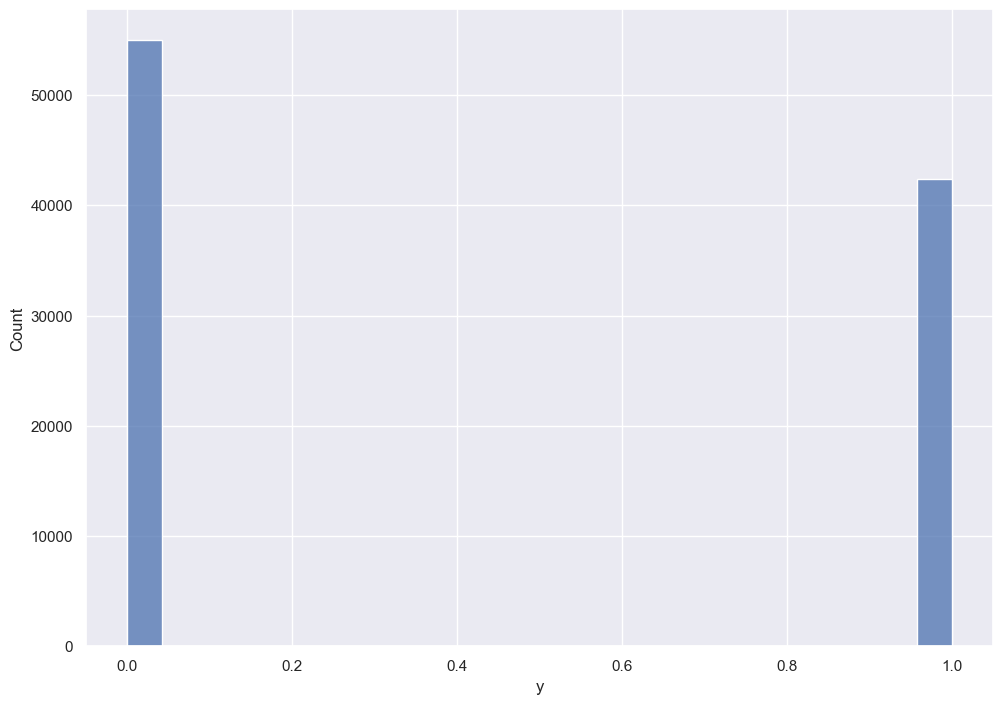

In [21]:
sns.histplot(X_y_train['y'])

In [25]:
X_y_train.corr(numeric_only=True)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,y
Age,1.000000,0.098764,0.015072,0.035957,0.021483,-0.000824,0.023406,0.208399,0.160770,0.074734,0.057528,0.038206,-0.050065,0.034467,0.054714,-0.008189,-0.010931,0.134074
Flight Distance,0.098764,1.000000,0.004938,-0.018508,0.063436,0.005740,0.055859,0.211447,0.156211,0.128991,0.113503,0.137181,0.067924,0.075491,0.092565,0.003788,-0.000151,0.297777
Inflight wifi service,0.015072,0.004938,1.000000,0.347605,0.715012,0.340091,0.133316,0.458714,0.122114,0.209914,0.121420,0.159570,0.121047,0.043056,0.130730,-0.016020,-0.017754,0.283292
Departure/Arrival time convenient,0.035957,-0.018508,0.347605,1.000000,0.441049,0.447268,-0.000090,0.073178,0.006307,-0.007846,0.067430,0.010224,0.071769,0.089484,0.007722,0.000110,-0.002199,-0.055496
Ease of Online booking,0.021483,0.063436,0.715012,0.441049,1.000000,0.461326,0.031566,0.405302,0.028880,0.048278,0.040310,0.108684,0.040951,0.008252,0.014708,-0.005774,-0.007096,0.169288
Gate location,-0.000824,0.005740,0.340091,0.447268,0.461326,1.000000,-0.002251,0.003700,0.003563,0.004402,-0.028593,-0.004734,0.002078,-0.038156,-0.006263,0.006053,0.005932,-0.002206
Food and drink,0.023406,0.055859,0.133316,-0.000090,0.031566,-0.002251,1.000000,0.234956,0.575119,0.623271,0.059023,0.033797,0.035810,0.083151,0.658304,-0.028073,-0.030628,0.209757
Online boarding,0.208399,0.211447,0.458714,0.073178,0.405302,0.003700,0.234956,1.000000,0.419520,0.284512,0.154184,0.123405,0.083953,0.204052,0.329480,-0.016926,-0.019800,0.503448
Seat comfort,0.160770,0.156211,0.122114,0.006307,0.028880,0.003563,0.575119,0.419520,1.000000,0.612330,0.131799,0.103900,0.074397,0.188156,0.678926,-0.027447,-0.030056,0.348821
Inflight entertainment,0.074734,0.128991,0.209914,-0.007846,0.048278,0.004402,0.623271,0.284512,0.612330,1.000000,0.420629,0.301805,0.379780,0.117699,0.692337,-0.026984,-0.030505,0.396654


<Axes: xlabel='Online boarding', ylabel='y'>

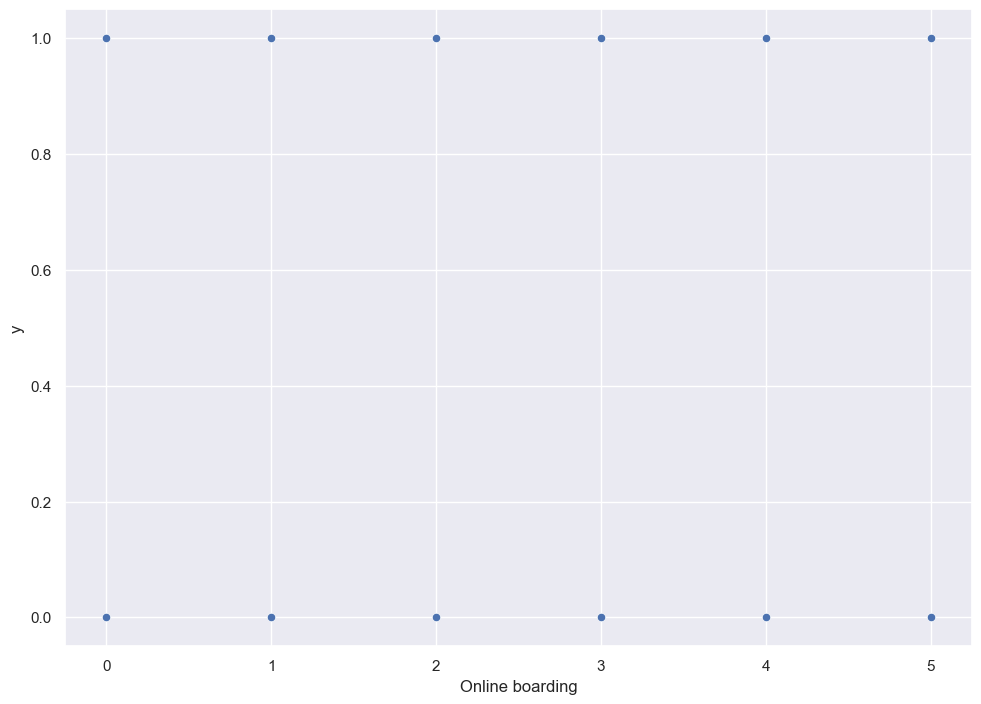

In [27]:
sns.scatterplot(data=X_y_train, x='Online boarding', y='y')

In [28]:
col_y = 'y'
col_x = 'Online boarding'

X_y_train \
    .groupby([col_x, col_y], as_index=False) \
    .agg({'Gender':'count'})

,Online boarding,y,Gender
0,0,False,1022
1,0,True,1297
2,1,False,8516
3,1,True,1358
4,2,False,14539
5,2,True,1859
6,3,False,17588
7,3,True,2808
8,4,False,10873
9,4,True,18049


In [35]:
X_y_train \
    .groupby([col_x, col_y], as_index=False) \
    .agg({'Gender':'count'}) \
    .pivot(index=col_y, columns=col_x, values='Gender')

Online boarding,0,1,2,3,4,5
y,,,,,,
False,1022,8516,14539,17588,10873,2489
True,1297,1358,1859,2808,18049,17012


In [44]:
numeric_factors = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_factors = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                       'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness']

In [37]:
X_y_train[numeric_factors + ['y']].corr()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,y
Age,1.000000,0.098764,-0.008189,-0.010931,0.134074
Flight Distance,0.098764,1.000000,0.003788,-0.000151,0.297777
Departure Delay in Minutes,-0.008189,0.003788,1.000000,0.959670,-0.050741
Arrival Delay in Minutes,-0.010931,-0.000151,0.959670,1.000000,-0.057802
y,0.134074,0.297777,-0.050741,-0.057802,1.000000


<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

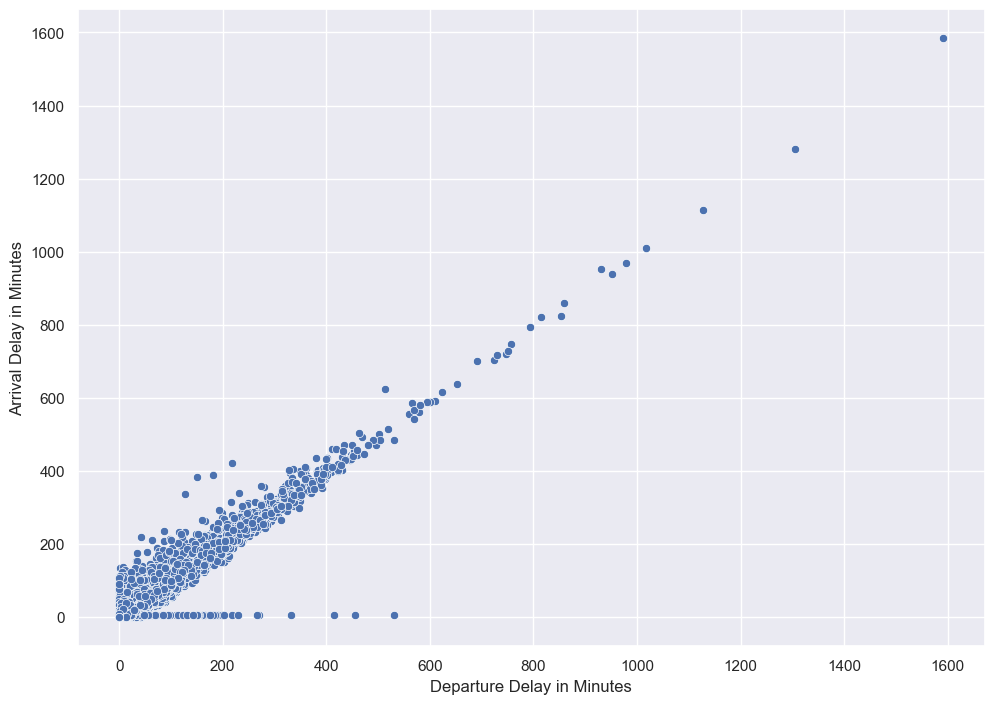

In [38]:
sns.scatterplot(data=X_y_train, x='Departure Delay in Minutes', y='Arrival Delay in Minutes')

In [39]:
X_y_train[X_y_train['Departure Delay in Minutes'] > 60][numeric_factors + ['y']].corr()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,y
Age,1.000000,0.095074,-0.018401,-0.023567,0.133101
Flight Distance,0.095074,1.000000,0.049094,0.034809,0.295254
Departure Delay in Minutes,-0.018401,0.049094,1.000000,0.955174,0.006485
Arrival Delay in Minutes,-0.023567,0.034809,0.955174,1.000000,0.008461
y,0.133101,0.295254,0.006485,0.008461,1.000000


In [40]:
excluded_numeric_factors = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [42]:
X_y_train.groupby('Inflight wifi service', as_index=False).agg({'y':['mean', 'count']})

Inflight wifi service         y       
                             mean  count
0                     0  0.997626   2949
1                     1  0.329143  16786
2                     2  0.246941  24107
3                     3  0.251605  24145
4                     4  0.600570  18599
5                     5  0.990207  10824

In [45]:
useful_categorical_factors = []

for factor in categorical_factors:
    factor_df = X_y_train.groupby(factor, as_index=False).agg({'y': ['mean', 'count']})
    factor_df = factor_df[factor_df[('y', 'count')] > 5000]
    
    diffs = []
    
    for _, row_1 in factor_df.iterrows():
        for _, row_2 in factor_df.iterrows():
            diffs.append(abs(row_1[('y', 'mean')] - row_2[('y', 'mean')]))
            
    if max(diffs) > 0.2:
        useful_categorical_factors.append(factor)

In [46]:
useful_categorical_factors

['Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness']

In [48]:
len(categorical_factors)

17

In [47]:
len(useful_categorical_factors)

15

In [50]:
X_y_train[useful_categorical_factors + ['y']].corr(numeric_only=True)

,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,y
Inflight wifi service,1.000000,0.715012,0.340091,0.133316,0.458714,0.122114,0.209914,0.121420,0.159570,0.121047,0.043056,0.130730,0.283292
Ease of Online booking,0.715012,1.000000,0.461326,0.031566,0.405302,0.028880,0.048278,0.040310,0.108684,0.040951,0.008252,0.014708,0.169288
Gate location,0.340091,0.461326,1.000000,-0.002251,0.003700,0.003563,0.004402,-0.028593,-0.004734,0.002078,-0.038156,-0.006263,-0.002206
Food and drink,0.133316,0.031566,-0.002251,1.000000,0.234956,0.575119,0.623271,0.059023,0.033797,0.035810,0.083151,0.658304,0.209757
Online boarding,0.458714,0.405302,0.003700,0.234956,1.000000,0.419520,0.284512,0.154184,0.123405,0.083953,0.204052,0.329480,0.503448
Seat comfort,0.122114,0.028880,0.003563,0.575119,0.419520,1.000000,0.612330,0.131799,0.103900,0.074397,0.188156,0.678926,0.348821
Inflight entertainment,0.209914,0.048278,0.004402,0.623271,0.284512,0.612330,1.000000,0.420629,0.301805,0.379780,0.117699,0.692337,0.396654
On-board service,0.121420,0.040310,-0.028593,0.059023,0.154184,0.131799,0.420629,1.000000,0.359508,0.521066,0.247995,0.123528,0.323291
Leg room service,0.159570,0.108684,-0.004734,0.033797,0.123405,0.103900,0.301805,0.359508,1.000000,0.372365,0.152628,0.096289,0.311889
Baggage handling,0.121047,0.040951,0.002078,0.035810,0.083953,0.074397,0.379780,0.521066,0.372365,1.000000,0.234794,0.096408,0.249289


In [52]:
col_x = 'Inflight wifi service'
col_y = 'Ease of Online booking'

X_y_train \
    .groupby([col_x, col_y], as_index=False) \
    .agg({'Gender':'count'}) \
    .pivot(index=col_y, columns=col_x, values='Gender')

Inflight wifi service,0,1,2,3,4,5
Ease of Online booking,,,,,,
0,2750.0,778.0,291.0,271.0,140.0,53.0
1,194.0,12137.0,1609.0,970.0,978.0,544.0
2,NaN,1260.0,17454.0,1972.0,1157.0,685.0
3,1.0,840.0,2060.0,17596.0,1536.0,685.0
4,1.0,885.0,1352.0,2040.0,13112.0,887.0
5,3.0,886.0,1341.0,1296.0,1676.0,7970.0


In [53]:
excluded_categorical_factors = ['Ease of Online booking', 'Gate location', 'Food and drink', 'Seat comfort', 'Baggage handling', 'Cleanliness']

In [54]:
len(categorical_factors)

17

In [55]:
len(excluded_categorical_factors)

6

In [56]:
numeric_factors_to_use = [x for x in numeric_factors if x not in excluded_numeric_factors]
categorical_factors_to_use = [x for x in categorical_factors if x not in excluded_categorical_factors]

In [57]:
numeric_factors_to_use

['Age', 'Flight Distance']

In [58]:
categorical_factors_to_use

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Online boarding',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Checkin service']

In [59]:
X_y_train_useful_factors = X_y_train[categorical_factors_to_use + numeric_factors_to_use + ['y']]

In [62]:
gender_encoder = BinaryEncoder()
gender_encoder.fit(X_y_train_useful_factors['Gender'])

BinaryEncoder(cols=['Gender'],
              mapping=[{'col': 'Gender',
                        'mapping':     Gender_0  Gender_1
 1         0         1
 2         1         0
-1         0         0
-2         0         0}])

In [63]:
gender_encoder.transform(X_y_train_useful_factors['Gender'])

,Gender_0,Gender_1
2049,0,1
49176,0,1
38346,1,0
36699,0,1
20521,1,0
...,...,...
45891,0,1
117952,0,1
42613,0,1
43567,1,0


In [64]:
gender_type_of_travel_encoder = BinaryEncoder()
gender_type_of_travel_encoder.fit(X_y_train_useful_factors[['Gender', 'Type of Travel']])

BinaryEncoder(cols=['Gender', 'Type of Travel'],
              mapping=[{'col': 'Gender',
                        'mapping':     Gender_0  Gender_1
 1         0         1
 2         1         0
-1         0         0
-2         0         0},
                       {'col': 'Type of Travel',
                        'mapping':     Type of Travel_0  Type of Travel_1
 1                 0                 1
 2                 1                 0
-1                 0                 0
-2                 0                 0}])

In [65]:
gender_type_of_travel_encoded = gender_type_of_travel_encoder\
    .transform(X_y_train_useful_factors[['Gender', 'Type of Travel']])

for col in gender_type_of_travel_encoded:
    X_y_train_useful_factors[col] = gender_type_of_travel_encoded[col]
    
X_y_train_useful_factors = X_y_train_useful_factors.drop(columns=['Gender', 'Type of Travel'])

In [66]:
X_y_train_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
2049,Loyal Customer,Eco,3,2,3,3,3,2,3,41,187,False,0,1,0,1
49176,disloyal Customer,Eco,1,1,1,4,1,1,2,14,1310,False,0,1,0,1
38346,Loyal Customer,Business,5,5,5,4,4,4,4,43,925,True,1,0,0,1
36699,Loyal Customer,Eco,3,4,3,3,3,3,1,50,925,False,0,1,0,1
20521,Loyal Customer,Eco,3,2,2,3,3,3,1,55,460,False,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,Loyal Customer,Business,3,5,5,5,5,5,2,50,1428,True,0,1,0,1
117952,Loyal Customer,Business,3,3,5,5,5,2,4,19,946,True,0,1,0,1
42613,Loyal Customer,Eco,5,5,5,3,4,5,3,19,493,True,0,1,1,0
43567,Loyal Customer,Eco,2,5,5,5,5,2,4,69,925,False,1,0,1,0


In [67]:
target_encoded_categories = [x for x in categorical_factors_to_use if x not in ['Gender', 'Type of Travel']]

In [68]:
for col in target_encoded_categories:
    X_y_train_useful_factors[col] = X_y_train_useful_factors[col].astype('category')

In [69]:
X_y_train_useful_factors.dtypes

Customer Type                        category
Class                                category
Inflight wifi service                category
Departure/Arrival time convenient    category
Online boarding                      category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Checkin service                      category
Age                                     int64
Flight Distance                         int64
y                                        bool
Gender_0                                int64
Gender_1                                int64
Type of Travel_0                        int64
Type of Travel_1                        int64
dtype: object

In [70]:
target_encoder = TargetEncoder()
target_encoder.fit(X_y_train_useful_factors[target_encoded_categories], y=X_y_train_useful_factors['y'])

TargetEncoder(cols=['Customer Type', 'Class', 'Inflight wifi service',
                    'Departure/Arrival time convenient', 'Online boarding',
                    'Inflight entertainment', 'On-board service',
                    'Leg room service', 'Checkin service'])

In [71]:
target_encoder.transform(X_y_train_useful_factors[target_encoded_categories])

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service
2049,0.478736,0.188327,0.251605,0.443421,0.137674,0.273650,0.316771,0.278303,0.448453
49176,0.240164,0.188327,0.329143,0.492300,0.137533,0.610346,0.196860,0.205081,0.250846
38346,0.478736,0.694691,0.990207,0.424992,0.872366,0.610346,0.536111,0.580755,0.460151
36699,0.478736,0.188327,0.251605,0.388344,0.137674,0.273650,0.316771,0.276713,0.242364
20521,0.478736,0.188327,0.251605,0.443421,0.113367,0.273650,0.316771,0.276713,0.242364
...,...,...,...,...,...,...,...,...,...
45891,0.478736,0.694691,0.251605,0.424992,0.872366,0.650755,0.648188,0.616631,0.250846
117952,0.478736,0.694691,0.251605,0.441579,0.872366,0.650755,0.648188,0.278303,0.460151
42613,0.478736,0.188327,0.990207,0.424992,0.872366,0.273650,0.536111,0.616631,0.448453
43567,0.478736,0.188327,0.246941,0.424992,0.872366,0.650755,0.648188,0.278303,0.460151


In [72]:
X_y_train_useful_factors.groupby('Customer Type').agg({'y':'mean'})

,y
Customer Type,
Loyal Customer,0.478736
disloyal Customer,0.240164


In [73]:
categorical_factors_encoded = target_encoder\
    .transform(X_y_train_useful_factors[target_encoded_categories])

for col in categorical_factors_encoded:
    X_y_train_useful_factors[col] = categorical_factors_encoded[col]

In [74]:
X_y_train_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
2049,0.478736,0.188327,0.251605,0.443421,0.137674,0.273650,0.316771,0.278303,0.448453,41,187,False,0,1,0,1
49176,0.240164,0.188327,0.329143,0.492300,0.137533,0.610346,0.196860,0.205081,0.250846,14,1310,False,0,1,0,1
38346,0.478736,0.694691,0.990207,0.424992,0.872366,0.610346,0.536111,0.580755,0.460151,43,925,True,1,0,0,1
36699,0.478736,0.188327,0.251605,0.388344,0.137674,0.273650,0.316771,0.276713,0.242364,50,925,False,0,1,0,1
20521,0.478736,0.188327,0.251605,0.443421,0.113367,0.273650,0.316771,0.276713,0.242364,55,460,False,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.478736,0.694691,0.251605,0.424992,0.872366,0.650755,0.648188,0.616631,0.250846,50,1428,True,0,1,0,1
117952,0.478736,0.694691,0.251605,0.441579,0.872366,0.650755,0.648188,0.278303,0.460151,19,946,True,0,1,0,1
42613,0.478736,0.188327,0.990207,0.424992,0.872366,0.273650,0.536111,0.616631,0.448453,19,493,True,0,1,1,0
43567,0.478736,0.188327,0.246941,0.424992,0.872366,0.650755,0.648188,0.278303,0.460151,69,925,False,1,0,1,0


In [77]:
scaler = StandardScaler()
scaler.fit(X_y_train_useful_factors.drop(columns='y'))

StandardScaler()

In [78]:
X_y_train_useful_factors[X_y_train_useful_factors.drop(columns='y').columns] = \
    scaler.transform(X_y_train_useful_factors.drop(columns='y'))

In [79]:
X_y_train_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,y,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
2049,0.473129,-0.991014,-0.703202,0.240835,-0.969222,-0.776461,-0.715252,-0.928639,0.107145,0.103861,-1.005799,False,-1.016020,1.016020,-0.669201,0.669201
49176,-2.113587,-0.991014,-0.406052,1.655446,-0.969682,0.842415,-1.439955,-1.362309,-1.478325,-1.680678,0.120675,False,-1.016020,1.016020,-0.669201,0.669201
38346,0.473129,1.042498,2.127330,-0.292515,1.424925,0.842415,0.610374,0.862665,0.200998,0.236049,-0.265516,True,0.984233,-0.984233,-0.669201,0.669201
36699,0.473129,-0.991014,-0.703202,-1.353132,-0.969222,-0.776461,-0.715252,-0.938060,-1.546384,0.698707,-0.265516,False,-1.016020,1.016020,-0.669201,0.669201
20521,0.473129,-0.991014,-0.703202,0.240835,-1.048430,-0.776461,-0.715252,-0.938060,-1.546384,1.029177,-0.731955,False,0.984233,-0.984233,1.494319,-1.494319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.473129,1.042498,-0.703202,-0.292515,1.424925,1.036710,1.287738,1.075145,-1.478325,0.698707,0.239040,True,-1.016020,1.016020,-0.669201,0.669201
117952,0.473129,1.042498,-0.703202,0.187523,1.424925,1.036710,1.287738,-0.928639,0.200998,-1.350208,-0.244451,True,-1.016020,1.016020,-0.669201,0.669201
42613,0.473129,-0.991014,2.127330,-0.292515,1.424925,-0.776461,0.610374,1.075145,0.107145,-1.350208,-0.698853,True,-1.016020,1.016020,1.494319,-1.494319
43567,0.473129,-0.991014,-0.721076,-0.292515,1.424925,1.036710,1.287738,-0.928639,0.200998,1.954494,-0.265516,False,0.984233,-0.984233,1.494319,-1.494319


In [80]:
X_train = X_y_train_useful_factors.drop(columns='y')

In [81]:
X_train

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
2049,0.473129,-0.991014,-0.703202,0.240835,-0.969222,-0.776461,-0.715252,-0.928639,0.107145,0.103861,-1.005799,-1.016020,1.016020,-0.669201,0.669201
49176,-2.113587,-0.991014,-0.406052,1.655446,-0.969682,0.842415,-1.439955,-1.362309,-1.478325,-1.680678,0.120675,-1.016020,1.016020,-0.669201,0.669201
38346,0.473129,1.042498,2.127330,-0.292515,1.424925,0.842415,0.610374,0.862665,0.200998,0.236049,-0.265516,0.984233,-0.984233,-0.669201,0.669201
36699,0.473129,-0.991014,-0.703202,-1.353132,-0.969222,-0.776461,-0.715252,-0.938060,-1.546384,0.698707,-0.265516,-1.016020,1.016020,-0.669201,0.669201
20521,0.473129,-0.991014,-0.703202,0.240835,-1.048430,-0.776461,-0.715252,-0.938060,-1.546384,1.029177,-0.731955,0.984233,-0.984233,1.494319,-1.494319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.473129,1.042498,-0.703202,-0.292515,1.424925,1.036710,1.287738,1.075145,-1.478325,0.698707,0.239040,-1.016020,1.016020,-0.669201,0.669201
117952,0.473129,1.042498,-0.703202,0.187523,1.424925,1.036710,1.287738,-0.928639,0.200998,-1.350208,-0.244451,-1.016020,1.016020,-0.669201,0.669201
42613,0.473129,-0.991014,2.127330,-0.292515,1.424925,-0.776461,0.610374,1.075145,0.107145,-1.350208,-0.698853,-1.016020,1.016020,1.494319,-1.494319
43567,0.473129,-0.991014,-0.721076,-0.292515,1.424925,1.036710,1.287738,-0.928639,0.200998,1.954494,-0.265516,0.984233,-0.984233,1.494319,-1.494319


In [82]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1000)

In [87]:
model = LogisticRegression(penalty='none')

In [88]:
model.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [89]:
model.predict(X_train)

array([ True,  True,  True, ...,  True,  True, False])

In [90]:
model.predict_proba(X_train)

array([[0.00570295, 0.99429705],
       [0.00186024, 0.99813976],
       [0.00874834, 0.99125166],
       ...,
       [0.17158536, 0.82841464],
       [0.44198135, 0.55801865],
       [0.9974701 , 0.0025299 ]])

In [91]:
pred_arr = model.predict_proba(X_train)[:, 1] >= 0.5

In [92]:
pred_arr

array([ True,  True,  True, ...,  True,  True, False])

In [93]:
(pred_arr == model.predict(X_train)).sum() == len(pred_arr)

True

In [94]:
# Model is scored by 'accuracy' score
model.score(X_train, y_train)

0.9216912821495544

In [96]:
accuracy_score(y_train, model.predict(X_train))

0.9216912821495544

In [97]:
precision_score(y_train, model.predict(X_train))

0.91215916998798

In [98]:
recall_score(y_train, model.predict(X_train))

0.9073660363110034

In [99]:
f1_score(y_train, model.predict(X_train))

0.9097562899282278

In [100]:
f1_score(y_val, model.predict(X_val))

0.9128995649706828

In [104]:
best_threshold = None
best_f1 = -float('inf')

probabilities = model.predict_proba(X_val)[:, 1]

for t in range(0, 1001):
    threshold = 0.001 * t

    y_val_pred = probabilities > threshold
    f1 = f1_score(y_val, y_val_pred)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

In [105]:
best_f1

0.9128995649706828

In [106]:
best_threshold

0.5

In [107]:
X_test_useful_factors = X_test[categorical_factors_to_use + numeric_factors_to_use]

In [108]:
gender_type_of_travel_encoded = gender_type_of_travel_encoder\
    .transform(X_test_useful_factors[['Gender', 'Type of Travel']])

for col in gender_type_of_travel_encoded:
    X_test_useful_factors[col] = gender_type_of_travel_encoded[col]
    
X_test_useful_factors = X_test_useful_factors.drop(columns=['Gender', 'Type of Travel'])

In [109]:
categorical_factors_encoded = target_encoder\
    .transform(X_test_useful_factors[target_encoded_categories])

for col in categorical_factors_encoded:
    X_test_useful_factors[col] = categorical_factors_encoded[col]

In [111]:
X_test_useful_factors[X_test_useful_factors.columns] = scaler.transform(X_test_useful_factors)

In [112]:
X_test_useful_factors

,Customer Type,Class,Inflight wifi service,Departure/Arrival time convenient,Online boarding,Inflight entertainment,On-board service,Leg room service,Checkin service,Age,Flight Distance,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1
125669,0.473129,-0.991014,-0.703202,0.240835,-0.969222,-1.055199,-1.075463,-0.938060,0.107145,-1.878960,-1.137205,-1.016020,1.016020,1.494319,-1.494319
90648,0.473129,1.042498,-0.703202,0.187523,0.615762,0.842415,0.610374,0.862665,0.200998,0.632613,1.488894,-1.016020,1.016020,-0.669201,0.669201
45322,0.473129,-0.991014,0.634131,0.187523,0.615762,0.842415,-0.715252,1.075145,0.200998,0.830895,0.609181,-1.016020,1.016020,-0.669201,0.669201
64084,0.473129,1.042498,2.127330,-0.292515,-1.048430,-1.407441,0.610374,-1.362309,-1.546384,-0.755362,-0.511274,-1.016020,1.016020,-0.669201,0.669201
71595,0.473129,-0.991014,0.634131,0.240835,-0.969682,0.842415,0.610374,-1.362309,-1.546384,0.963083,-0.859348,0.984233,-0.984233,1.494319,-1.494319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127886,0.473129,1.042498,0.634131,-1.353132,-0.969682,0.842415,0.610374,0.862665,-1.478325,0.566519,2.643455,0.984233,-0.984233,-0.669201,0.669201
37272,0.473129,1.042498,-0.721076,0.240835,1.424925,1.036710,1.287738,1.075145,1.449067,0.896989,0.504860,-1.016020,1.016020,-0.669201,0.669201
36325,0.473129,-0.991014,2.127330,0.187523,1.424925,1.036710,-0.715252,0.862665,-1.478325,-0.557080,-0.884425,-1.016020,1.016020,1.494319,-1.494319
75258,-2.113587,1.042498,-0.406052,1.655446,-0.969682,-1.407441,-0.715252,-0.938060,1.449067,-0.689268,-0.980722,0.984233,-0.984233,-0.669201,0.669201


In [113]:
print('Accuracy на тестовой выборке:', accuracy_score(y_test, model.predict(X_test_useful_factors)))
print('Precision на тестовой выборке:', precision_score(y_test, model.predict(X_test_useful_factors)))
print('Recall на тестовой выборке:', recall_score(y_test, model.predict(X_test_useful_factors)))

Accuracy на тестовой выборке: 0.9225130890052357
Precision на тестовой выборке: 0.9132554304968098
Recall на тестовой выборке: 0.9070131719473122


In [114]:
boot_accuracies = []
boot_precisions = []
boot_recalls = []

X_y_test = X_test_useful_factors.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_test_boot = X_y_test.sample(len(X_y_test), replace=True)
    X_test_boot = X_y_test_boot.drop(columns='y')
    y_test_boot = X_y_test_boot['y']
    
    predicted_probas = model.predict_proba(X_test_boot)
    y_pred = predicted_probas[:, 1] >= best_threshold
    
    boot_accuracies.append(accuracy_score(y_test_boot, y_pred))
    boot_precisions.append(precision_score(y_test_boot, y_pred))
    boot_recalls.append(recall_score(y_test_boot, y_pred))

<Axes: ylabel='Count'>

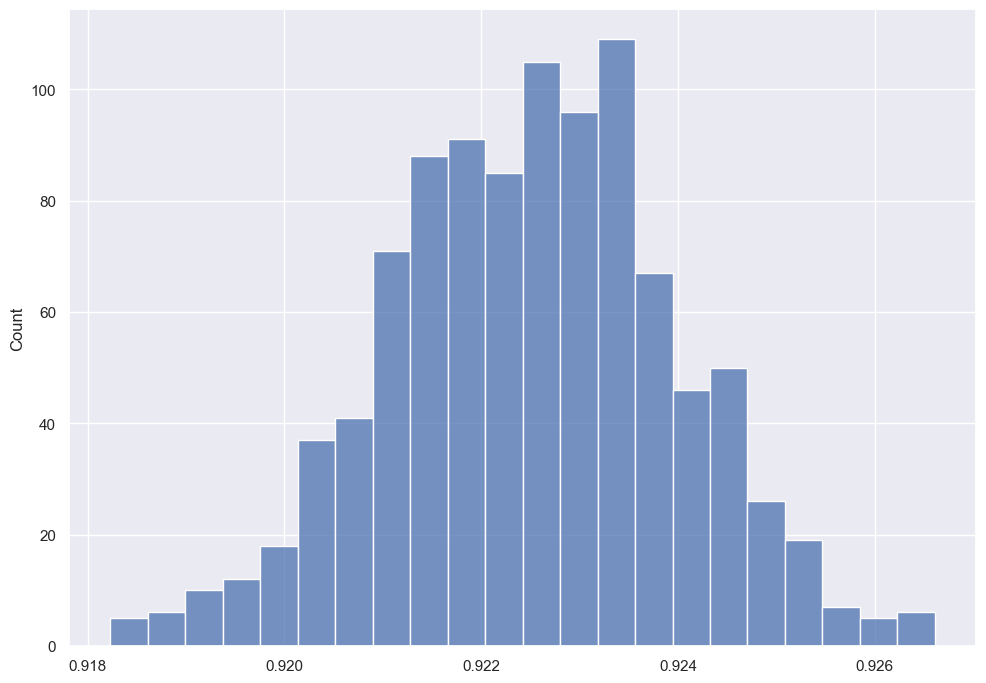

In [115]:
sns.histplot(boot_accuracies)

In [117]:
boot_accuracies_sorted = list(sorted(boot_accuracies))
boot_accuracies_sorted = boot_accuracies_sorted[25:975]

print('Доверительный интервал для accuracy:', 
      '(' + str(round(boot_accuracies_sorted[0], 3)) + ', ' + str(round(boot_accuracies_sorted[-1], 3)) + ')')

Доверительный интервал для accuracy: (0.92, 0.925)


In [116]:
boot_precisions_sorted = list(sorted(boot_precisions))
boot_precisions_sorted = boot_precisions_sorted[25:975]

print('Доверительный интервал для precision:', 
      '(' + str(round(boot_precisions_sorted[0], 3)) + ', ' + str(round(boot_precisions_sorted[-1], 3)) + ')')

Доверительный интервал для precision: (0.908, 0.918)


In [118]:
boot_recalls_sorted = list(sorted(boot_recalls))
boot_recalls_sorted = boot_recalls_sorted[25:975]

print('Доверительный интервал для recall:', 
      '(' + str(round(boot_recalls_sorted[0], 3)) + ', ' + str(round(boot_recalls_sorted[-1], 3)) + ')')

Доверительный интервал для recall: (0.902, 0.912)


In [119]:
len(X_y_test)

32470

In [120]:
model.coef_

array([[ 9.99274571e-01,  5.49430449e-01,  1.74247203e+00,
         2.44805452e-01,  1.10767320e+00,  2.78175784e-01,
         4.76774546e-01,  4.36365735e-01,  5.52913623e-01,
        -5.10817420e-02,  5.40542737e-02, -1.27557640e-03,
         1.27557640e-03, -7.55214100e-01,  7.55214100e-01]])